#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

***

# ___Task 1:___ **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

First I'll idnetify the number of rows and columns to get an idea of how big the dataset is:

In [3]:
df.shape

(148654, 13)

The **.shape** attribute returns a tuple in which the first element is the number of rows and the second row is the number of columns. So, there are 148654 rows and 13 columns in the dataset. The dataset seems to be relatively big.

Now I'll check the data types of each column:

In [4]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

As we can see here, most of the 13 columns are of the **float64** data type. Two columns are **int64** and the remaining three are of type **object** (or string).

I'll now check for missing values:

In [5]:
missing_values = df.isna().sum()
missing_values

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

As we can see above, the Notes and Status columns are completely empty as they have the same number of missing values as the total number of rows. Benefits column has a significant number of missing values (36163), while the BasePay column has a relatively small number of missing values. OtherPay amd OvertimePay has just 4 entries as null.

***

# ___Task 2___: **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

Assuming that by salary, you're talking about the BasePay column. Here's the required statistics:

In [8]:
# Getting the stats
mean_value = df['BasePay'].mean()
median_value = df['BasePay'].median()
mode_value = df['BasePay'].mode()[0]  # mode() returns a Series, so we take the first value
min_value = df['BasePay'].min()
max_value = df['BasePay'].max()

In [9]:
# Printing the stats
print(f"Mean of 'BasePay': {mean_value}")
print(f"Median of 'BasePay': {median_value}")
print(f"Mode of 'BasePay': {mode_value}")
print(f"Minimum of 'BasePay': {min_value}")
print(f"Maximum of 'BasePay': {max_value}")

Mean of 'BasePay': 66325.4488404877
Median of 'BasePay': 65007.45
Mode of 'BasePay': 0.0
Minimum of 'BasePay': -166.01
Maximum of 'BasePay': 319275.01


I noticed that there are negative values in the BasePay column which does not make any sense because a salary cannot be negative! <br> Also, the mode which is the most repeated value is zero which also does not make much sense to me because surely there must be a salary for the employees.

The range of salaries:

In [15]:
print(f'The range of salaries is from {min_value} up to {max_value}.\n'
      f'This is a difference of {max_value-min_value} between highest and lowest salary')

The range of salaries is from -166.01 up to 319275.01.
This is a difference of 319441.02 between highest and lowest salary


Of course the difference here is higher than the max salary because the min salary is negative...

Now I'll calculate the standard deviation which indicates how much individual values in a data set differ from the mean of the set.

In [16]:
std_deviation = df['BasePay'].std() # Null values are not taken into account in this method
std_deviation

42764.63549525887

Is this standard deviation high or low? Let's compare it to the mean.

If the standard deviation is a small fraction of the mean, the data points are relatively close to the mean (low variability). Conversely, if the standard deviation is a large fraction of the mean, the data points are more spread out (high variability).

In [17]:
print(f"Mean of 'BasePay': {mean_value}")
print(f"Standard deviation of 'BasePay': {std_deviation}")

Mean of 'BasePay': 66325.4488404877
Standard deviation of 'BasePay': 42764.63549525887


* The relatively high standard deviation, compared to the mean, suggests a wide spread in the salaries of employees. This means there is considerable variability in what employees are paid.
* Since the standard deviation is about 64% of the mean (42,764.64/66,325.45), this indicates that employee salaries vary significantly from the average salary.
* Such a high standard deviation could indicate significant disparities in pay among employees, possibly due to factors like different job roles, levels of experience, or performance.

***

# ___Task 3:___ **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

I'll go through each column one by one and explain my methodology for handling missing data:

### 1. BasePay (609 missing out of 148,654):
* Percentage Missing: Approximately 0.41%. This is a relatively small proportion.
* Handling Strategy: I can fill these missing values using the mean or median of the 'BasePay' column. The choice between mean and median depends on the distribution of 'BasePay'. If it's normally distributed, I can use the mean, if skewed, I'll use the median.

Let's check if its normally distributed:

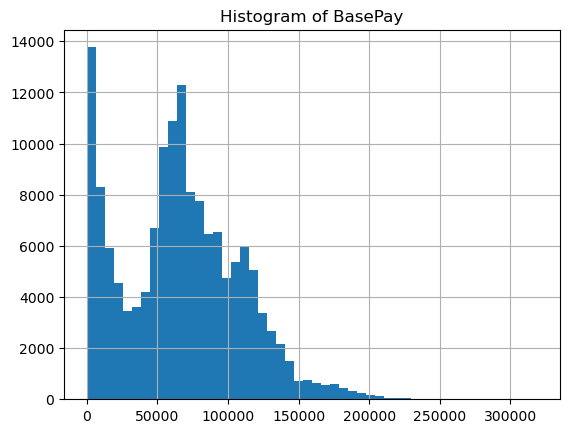

In [21]:
import matplotlib.pyplot as plt

# Histogram
df['BasePay'].hist(bins=50)
plt.title('Histogram of BasePay')
plt.show()

The data appears to be skewed to the right. Using the mean in the presence of skewness can lead to misrepresentation of the data's central tendency, while the median provides a more resilient measure that's less likely to be influenced by outliers or a skewed distribution.

Therefore, I'll fill the missing values in the BasePay column with the median value of that column: (Note: we've already calculated the median previously)

In [22]:
df['BasePay'].fillna(value=median_value, inplace=True)

### 2. OvertimePay and OtherPay columns:
* Percentage Missing: Negligible (about 0.0027%).
* Handling Strategy: Given the negligible amount, I'll just simply set them to 0 assuming no overtime or other pay was recorded for these entries.

In [24]:
# Fill missing values in 'OvertimePay' and 'OtherPay' with 0
df['OvertimePay'] = df['OvertimePay'].fillna(0)
df['OtherPay'] = df['OtherPay'].fillna(0)

### 3. Benefits (36,163 missing out of 148,654):
* Percentage Missing: Approximately 24.32%. This is a significant proportion.
* Handling Strategy: This requires more careful thought. Maybe Benefits is correlated with other variables like 'BasePay'. If that's the case, I could use a model-based imputation method like linear regression to predict the missing Benefits. If there's no correlation, I could either fill them with 0, or use the median/mean.

In [25]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Look at the 'Benefits' column in particular
benefits_correlation = correlation_matrix['Benefits']
benefits_correlation

Id                 -0.348957
BasePay             0.914150
OvertimePay         0.301207
OtherPay            0.233178
Benefits            1.000000
TotalPay            0.884097
TotalPayBenefits    0.930140
Year               -0.043136
Notes                    NaN
Status                   NaN
Name: Benefits, dtype: float64